/var/folders/fv/pw9clbt94rxg00yyj63cdrth0000gn/T/ipykernel_78588/3276935829.py:61: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/fv/pw9clbt94rxg00yyj63cdrth0000gn/T/ipykernel_78588/3276935829.py:61: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


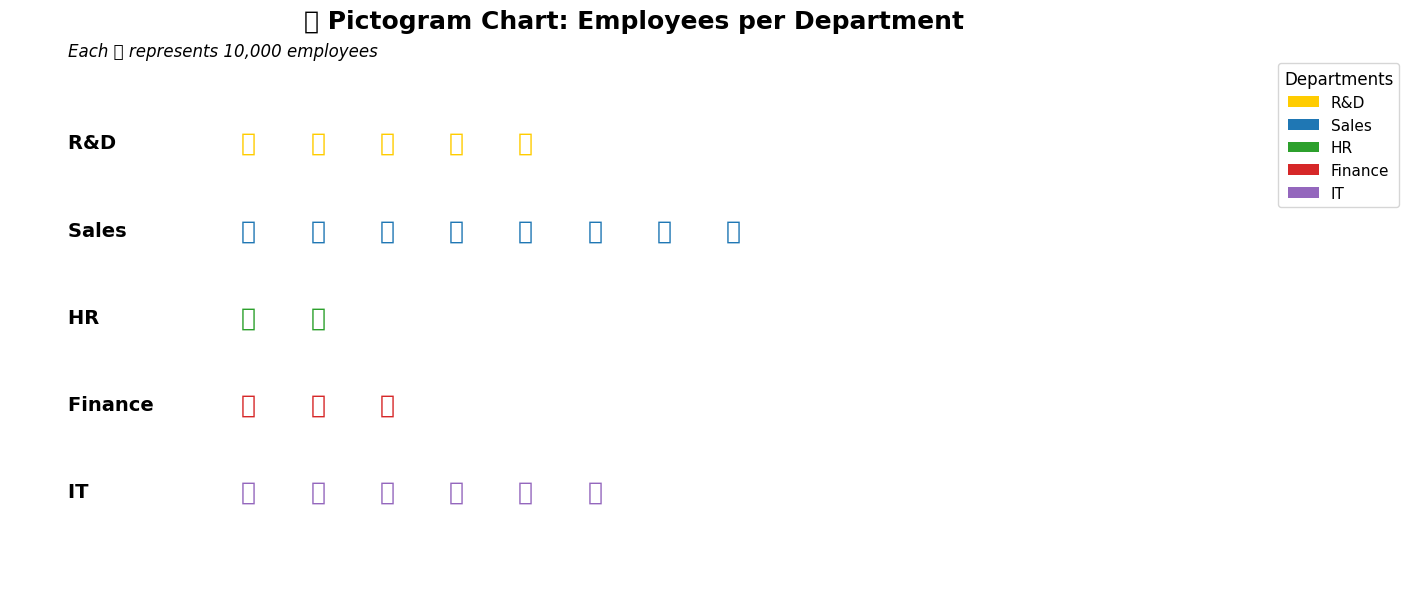

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Sample data (in thousands)
departments = ['R&D', 'Sales', 'HR', 'Finance', 'IT']
values = [50, 80, 20, 30, 60]  # In '000s (50k = 5 stars)

# Symbol and formatting
symbol = '⭐'
unit_value = 10  # One star = 10k
symbol_size = 18
horizontal_gap = 0.6

# Color for each department
dept_colors = {
    'R&D': '#ffcc00',      # Golden yellow
    'Sales': '#1f77b4',    # Blue
    'HR': '#2ca02c',       # Green
    'Finance': '#d62728',  # Red
    'IT': '#9467bd',       # Purple
}

# Create figure
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_xlim(0, max(values)//unit_value * horizontal_gap + 6)
ax.set_ylim(-1, len(departments))
ax.axis('off')

# Draw pictogram chart
for idx, dept in enumerate(departments):
    star_count = values[idx] // unit_value
    y_pos = len(departments) - 1 - idx
    
    # Draw department label
    ax.text(0.5, y_pos, f"{dept:<10}", fontsize=14, fontweight='bold', va='center')
    
    # Draw stars with spacing and color
    for j in range(star_count):
        x = 2 + j * horizontal_gap
        ax.text(x, y_pos, symbol, fontsize=symbol_size, va='center', color=dept_colors[dept])

# Title and axis label
plt.title("🌟 Pictogram Chart: Employees per Department", fontsize=18, fontweight='bold', pad=20)
plt.text(0.5, len(departments), "Each ⭐ represents 10,000 employees", fontsize=12, style='italic')

# Legend
legend_elements = [
    Patch(facecolor=color, label=dept)
    for dept, color in dept_colors.items()
]
plt.legend(
    handles=legend_elements,
    title="Departments",
    loc='upper right',
    bbox_to_anchor=(1.12, 1),
    fontsize=11,
    title_fontsize=12
)

# Show chart
plt.tight_layout()
plt.show()


/var/folders/fv/pw9clbt94rxg00yyj63cdrth0000gn/T/ipykernel_78588/3691251426.py:66: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


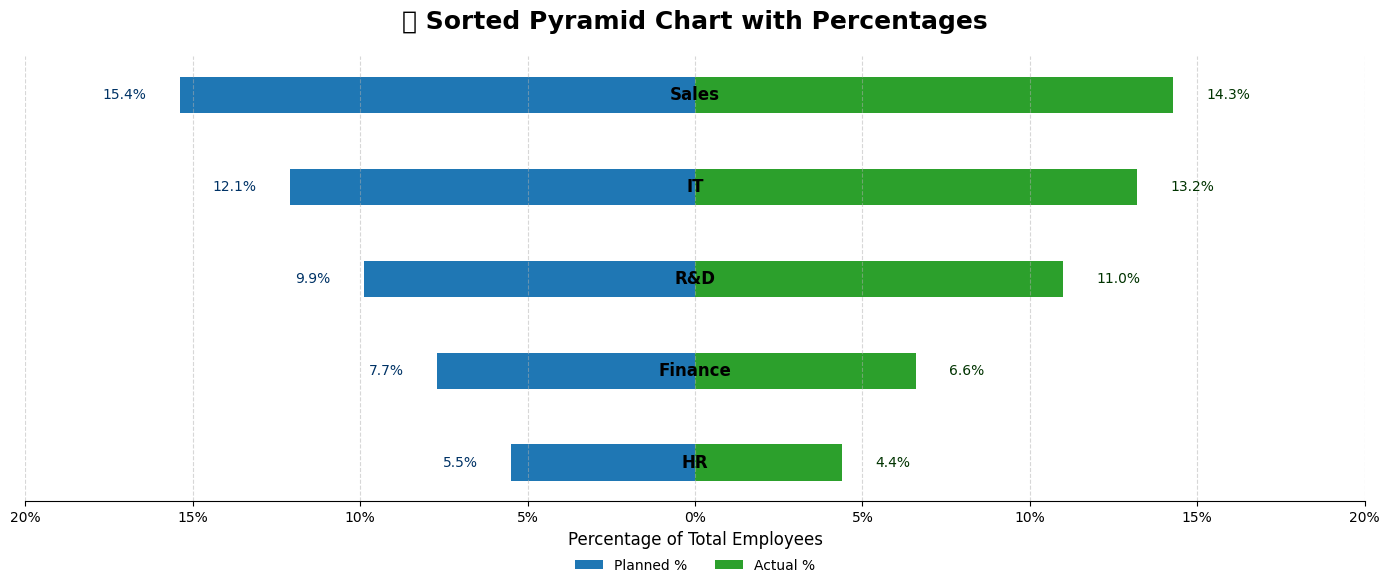

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
departments = ['R&D', 'Sales', 'HR', 'Finance', 'IT']
planned = [45, 70, 25, 35, 55]
actual = [50, 65, 20, 30, 60]

# Calculate total per dept and sort by total
combined = list(zip(departments, planned, actual))
combined_sorted = sorted(combined, key=lambda x: x[1] + x[2], reverse=True)

departments_sorted = [x[0] for x in combined_sorted]
planned_sorted = [x[1] for x in combined_sorted]
actual_sorted = [x[2] for x in combined_sorted]

# Compute totals for percentages
total_all = sum(planned_sorted) + sum(actual_sorted)
planned_percent = [p / total_all * 100 for p in planned_sorted]
actual_percent = [a / total_all * 100 for a in actual_sorted]

# Reverse for horizontal bar plotting
departments_rev = departments_sorted[::-1]
planned_rev = planned_percent[::-1]
actual_rev = actual_percent[::-1]

# Bar positions
y_pos = np.arange(len(departments_rev))

# Figure setup
fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.4

# Plot mirrored horizontal bars
bars1 = ax.barh(y_pos, [-x for x in planned_rev], height=bar_width, color='#1f77b4', label='Planned %')
bars2 = ax.barh(y_pos, actual_rev, height=bar_width, color='#2ca02c', label='Actual %')

# Center labels
for i, dept in enumerate(departments_rev):
    ax.text(0, i, dept, ha='center', va='center', fontsize=12, fontweight='bold')

# Add % labels on each bar
for i, (p, a) in enumerate(zip(planned_rev, actual_rev)):
    ax.text(-p - 1, i, f"{p:.1f}%", va='center', ha='right', fontsize=10, color='#003366')
    ax.text(a + 1, i, f"{a:.1f}%", va='center', ha='left', fontsize=10, color='#003300')

# Axis settings
ax.set_yticks([])
ax.set_xticks(np.arange(-20, 21, 5))
ax.set_xticklabels([f"{abs(x)}%" for x in ax.get_xticks()])
ax.set_xlim(-20, 20)
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Title & labels
plt.title("🔄 Sorted Pyramid Chart with Percentages", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Percentage of Total Employees", fontsize=12)

# Legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False)

# Remove borders
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

# Final layout
plt.tight_layout()
plt.show()
